In [ ]:
!pip install pm4py

In [24]:
import pm4py
import pandas as pd
import numpy as np
from PIL import Image
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

In [5]:
dummy = pd.DataFrame(np.array([
['A', '06/10/2021' , 'waking' ],
['A', '06/11/2021' , 'eating'],
['A', '06/12/2021' , 'sleeping'],
['B', '06/12/2021' , 'waking'],
['B', '06/13/2021' , 'eating'],
['B', '06/14/2021' , 'sleeping'],
['C', '06/06/2021' , 'waking'], 
['C', '06/11/2021' , 'sleeping'],
['C', '06/12/2021' , 'eating'],
['D', '06/15/2021' , 'eating'],
['D', '06/16/2021' , 'eating'],
['E', '06/15/2021' , 'eating'],
['E', '06/26/2021' , 'eating'],
['F', '06/11/2021' , 'waking'],
['F', '06/15/2021' , 'sleeping']]),
columns=['case:concept:name', 'time:timestamp', 'concept:name'])

In [6]:
dummy = dataframe_utils.convert_timestamp_columns_in_df(dummy)

#DFG

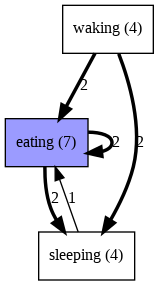

In [22]:
# Variant = Frequency
log = log_converter.apply(dummy)
variant=dfg_visualization.Variants.FREQUENCY
dfg = dfg_discovery.apply(log)
gviz = dfg_visualization.apply(dfg, log=log, variant=variant)
# display viz
Image.open(dfg_visualization.view(gviz))

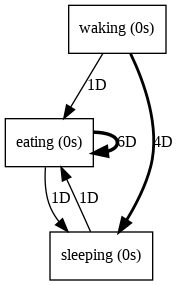

In [21]:
# Variant = Performance
log = log_converter.apply(dummy)
variant=dfg_visualization.Variants.PERFORMANCE
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)
gviz = dfg_visualization.apply(dfg, log=log, variant=variant)
# display viz
Image.open(dfg_visualization.view(gviz))

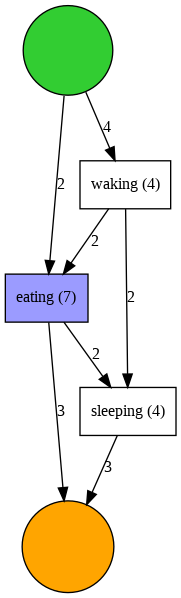

In [25]:
# Filtering edges
log = log_converter.apply(dummy)
_, start_activities, end_activities = pm4py.discover_dfg(log)
variant=dfg_visualization.Variants.FREQUENCY
dfg = dfg_discovery.apply(log)
parameters = {
dfg_visualization.Variants.FREQUENCY.value.Parameters.MAX_NO_EDGES_IN_DIAGRAM: 3,    
dfg_visualization.Variants.FREQUENCY.value.Parameters.START_ACTIVITIES: start_activities,
dfg_visualization.Variants.FREQUENCY.value.Parameters.END_ACTIVITIES: end_activities
}
gviz = dfg_visualization.apply(dfg, log=log, variant=variant, parameters= parameters)
Image.open(dfg_visualization.view(gviz))

# Heuristic Miner

In [30]:
log = log_converter.apply(dummy)
heu_net = heuristics_miner.apply_heu(log)
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

In [31]:
# filtering edges
log = log_converter.apply(dummy)
heu_net = heuristics_miner.apply_heu(log, parameters={ heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES: 4})
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)